In [12]:
import pandas as pd;

In [70]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
import yfinance as yf;

In [6]:
dat = yf.Ticker("MSFT");

In [29]:
df = yf.download("MSFT", period="max");

C:\Users\lowe_\AppData\Local\Temp\ipykernel_152592\370499627.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT", period="max");
[*********************100%***********************]  1 of 1 completed


In [14]:
print(df.head);

<bound method NDFrame.head of Price            Close        High         Low        Open      Volume
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT
Date                                                                  
1986-03-13    0.059500    0.062156    0.054188    0.054188  1031788800
1986-03-14    0.061625    0.062688    0.059500    0.059500   308160000
1986-03-17    0.062688    0.063219    0.061625    0.061625   133171200
1986-03-18    0.061093    0.063219    0.060562    0.062688    67766400
1986-03-19    0.060031    0.061625    0.059500    0.061093    47894400
...                ...         ...         ...         ...         ...
2025-10-01  519.710022  520.510010  511.690002  514.799988    22632300
2025-10-02  515.739990  521.599976  510.679993  517.640015    21222900
2025-10-03  517.349976  520.489990  515.000000  517.099976    15112300
2025-10-06  528.570007  531.030029  518.200012  518.609985    21388600
2025-10-07  523.979980  529.799988  521.440002 

In [30]:
Target = (
    df["Close"]
    .rolling(2) #we only want to consider current and previous
    .apply(lambda x: 1 if x.iloc[-1] > x.iloc[0] else 0, raw=False)
)

In [33]:
df["Target"] = Target;

In [34]:
# 1 = price went up, 0 = price went down or stayed the same
print(df[["Close", "Target"]].head(10));

Price          Close Target
Ticker          MSFT       
Date                       
1986-03-13  0.059500    NaN
1986-03-14  0.061625    1.0
1986-03-17  0.062688    1.0
1986-03-18  0.061093    0.0
1986-03-19  0.060031    0.0
1986-03-20  0.058437    0.0
1986-03-21  0.056844    0.0
1986-03-24  0.055250    0.0
1986-03-25  0.056312    1.0
1986-03-26  0.057906    1.0


In [35]:
print(df);

Price            Close        High         Low        Open      Volume Target
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT       
Date                                                                         
1986-03-13    0.059500    0.062156    0.054188    0.054188  1031788800    NaN
1986-03-14    0.061625    0.062688    0.059500    0.059500   308160000    1.0
1986-03-17    0.062688    0.063219    0.061625    0.061625   133171200    1.0
1986-03-18    0.061093    0.063219    0.060562    0.062688    67766400    0.0
1986-03-19    0.060031    0.061625    0.059500    0.061093    47894400    0.0
...                ...         ...         ...         ...         ...    ...
2025-10-01  519.710022  520.510010  511.690002  514.799988    22632300    1.0
2025-10-02  515.739990  521.599976  510.679993  517.640015    21222900    0.0
2025-10-03  517.349976  520.489990  515.000000  517.099976    15112300    1.0
2025-10-06  528.570007  531.030029  518.200012  518.609985    21

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.ensemble import RandomForestClassifier # uses multiple decision trees

In [45]:
from sklearn.metrics import classification_report, accuracy_score

In [46]:
# Drop NaN rows (first row is NaN in Target)
df = df.dropna()

In [47]:
# Features and target
X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df["Target"]

In [48]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # keep the data in order
)

In [50]:
# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
# Predictions
y_pred = model.predict(X_test);

In [54]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0)) #zero_division=0 suppresses warnings

Accuracy: 0.5416248746238717
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       914
         1.0       0.54      1.00      0.70      1080

    accuracy                           0.54      1994
   macro avg       0.27      0.50      0.35      1994
weighted avg       0.29      0.54      0.38      1994



In [58]:
# Stock Change Prediction Part 2 - Five Fold Cross Validation

In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [55]:
import numpy as np

In [57]:
# Features and target
X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df["Target"].dropna()
X = X.loc[y.index]  # align indices

In [64]:
"""
I chose five‑fold cross validation for this because it is a happy middle-ground approach. 
It provides a more reliable estimate of model performance than a single split, 
while being computationally efficient compared to leave‑one‑out.
"""

'\nI chose five‑fold cross validation for this because it is a happy middle-ground approach. \nIt provides a more reliable estimate of model performance than a single split, \nwhile being computationally efficient compared to leave‑one‑out.\n'

In [59]:
# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
# Five-fold cross validation
kf = KFold(n_splits=5, shuffle=False)  # keep in order like we did earlier
scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

In [61]:
# print the results
print("Five-fold CV scores:", scores)
print("Mean accuracy:", np.mean(scores))

Five-fold CV scores: [0.54814443 0.64343029 0.68455366 0.60130391 0.489714  ]
Mean accuracy: 0.5934292591774321


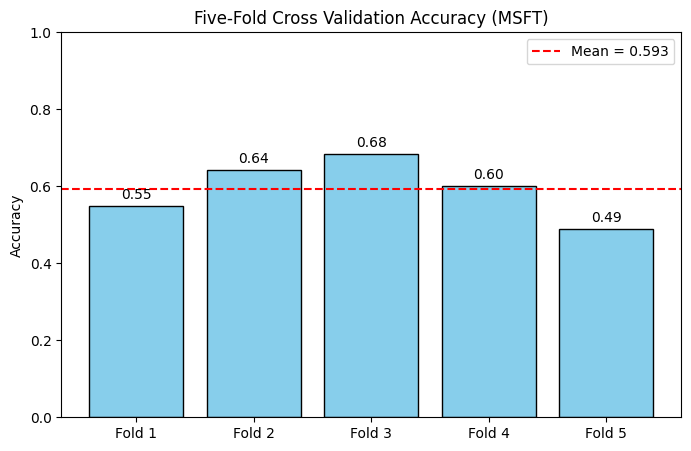

In [71]:
# 5. Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(range(1, 6), scores, color="skyblue", edgecolor="black")
plt.axhline(np.mean(scores), color="red", linestyle="--", label=f"Mean = {scores.mean():.3f}")
plt.xticks(range(1, 6), [f"Fold {i}" for i in range(1, 6)])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Five-Fold Cross Validation Accuracy (MSFT)")
plt.legend()

# Annotate bars with values
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha="center", va="bottom")

plt.show()